<hr style="border:5px solid cyan"> </hr>

## <span style='background:rgba(0,255,255, 0.5); color:black'>Activity: Classes of Fourier approximations</span><a id='activity-polynomials'></a>

Given a function $f(x)$ that is defined on the interval $[-1,1]$, it is usually possible to write $f(x)$ approximately as a sum of functions that look like waves - sine and cosine: $$f(x)\approx \dfrac{a_0}{2}+\sum_{i=1}^{n}\left( a_i\cos \left( \dfrac{i\pi x}{2}\right)+b_i\sin \left( \dfrac{i\pi x}{2}\right)\right)$$ where the $a_i$ and $b_i$ are the coefficients of cosine and sine respectively. $n$ is referring to the number of terms used; the approximation gets better and better as $n$ gets larger. This type of approximation of a function is referred to as a Fourier approximation. See https://en.wikipedia.org/wiki/Fourier_analysis for some history of this idea. As an example, consider the function $f(x)=x$. Let's we want to use up to 3 terms of cosines and sines to approximate $f$. It turns out that all the $a_i$'s are 0 and $b_0=0$, $b_1=0.40528473$, $b_2=0.31830989$, and $b_3=-0.04503164$ so that $$f(x)\approx 0.40528473\sin \left( \dfrac{\pi x}{2}\right)+0.31830989\sin \left( \dfrac{2\pi x}{2}\right)-0.04503164\sin \left( \dfrac{3\pi x}{2}\right).$$ A graph of $f(x)$ and the approximation is created in the cell block below.

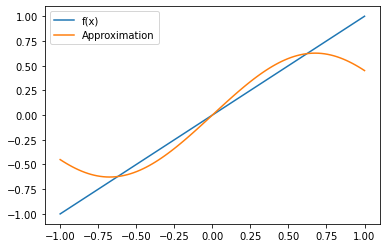

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x): # defining f(x)
    return(x)

def approx(x): # defining the approximation of f(x) using cosine's and sine's
    return(0.40528473*np.sin(np.pi*x/2)+0.31830989*np.sin(2*np.pi*x/2)-0.04503164*np.sin(3*np.pi*x/2))

x = np.linspace(-1,1,100) # 100 values between -1 and 1 to use for plotting
plt.figure()
plt.plot(x, f(x), label='f(x)')
plt.plot(x, approx(x), label='Approximation')
plt.legend()
plt.show()

Our goal in this activity is to create a class called `FourierApprox` that will take a function `func` and integer `n` and create the coefficients `as` and `bs` of the Fourier approximation using `n` terms as well as evaluate and plot the approximation. The below code cell contains the beginnings of such a class.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.integrate as integrate

class FourierApprox(object):
    
    '''
    This class creates a Fourier approximation of a given function and provides methods to evaluate 
    and plot the Fourier approximation. 
    
    Variables 
    ---------
    func: function to be approximation. Function needs to be defined on the interval [-1,1].
    n: number of terms to be kept from the Fourier series. 
    
    Attributes
    ----------
    as: array with shape n+1 that contains the coefficients a_k from k=0 to k=n. 
    bs: array with shape n+1 that contains the coefficients b_k from k=0 to k=n. 
    
    Methods
    -------
    fourier_approx_eval(x): evaluates the Fourier approximation of func at x.
    plot(): plots the Fourier approximation along with func.
    '''
    
    def __init__(self, func, n):
        
        self.func = func
        self.n = n
        
        # creating coefficients of Fourier approximation as a attributes as and bs
        coefficients = np.zeros(shape=(2,self.n+1))
        coefficients[0,0] = integrate.quad(func, -1, 1)[0]/2
        def integrand_as(x,m):
            return(self.func(x)*np.cos(m*np.pi*x/2)/2)
        def integrand_bs(x,m):
            return(self.func(x)*np.sin(m*np.pi*x/2)/2)
        for i in range(self.n):
            coefficients[0,i+1] = integrate.quad(integrand_as, -1, 1, args=i+1)[0]
            coefficients[1,i+1] = integrate.quad(integrand_bs, -1, 1, args=i+1)[0]
            
        self.as = coefficients[0,:]
        self.bs = coefficients[1,:]
            
    def fourier_approx_eval(self, x):
        
        '''
        Method for evaluating the Fourier approximation at x. 
        '''
        
        fourier_approx_value = self.as[0]/2
        for i in range(self.n):
            fourier_approx_value += self.as[i+1]*np.cos((i+1)*np.pi*x/2) + self.bs[i+1]*np.sin((i+1)*np.pi*x/2)
        return(fourier_approx_value)
    
    def plot(self):
        
        '''
        Method for plotting the Fourier approximation and the original function.
        '''
        

- Finish coding the `plot` method in the above `FourierApprox` class so that the `plot` method will plot the original function `func` and the Fourier approximation `fourier_approx_eval` on the same plot from -1.0 to 1.0. 
- Edit the class so that `n` has a default value of 10.
- Create your own function in the cell below to test the code.
- Use the `plot` method to graph your function along with its Fourier approximation with `n`=20 terms.

In [ ]:
def func(x):
    # define your own function here; make sure your function can take both `float` and `ndarray` types as inputs
    return()

In [ ]:
# use the plot method of Fourier_approx to plot your function along with its Fourier approximation using n=20 terms


<hr style="border:5px solid cyan"> </hr>

<hr style="border:5px solid cyan"> </hr>

## <span style='background:rgba(0,255,255, 0.5); color:black'>Activity: Applying the `Fourier_approx` class</span><a id='activity-polynomials'></a>

There are numerous applications for writing a function using a Fourier approximation. One such application is to look at how a rod that has some initial heat distribution slowly cools (or heats) to the ambient temperature. If we take the ambient temperature to be 0, the initial heat distribution to be given by some function $f(x)$, and the length of the rod to be 2 units, then the heat after $t$ seconds is given approximately by $$\sum_{i=1}^{n}b_i\sin \left( \dfrac{i \pi x}{2}\right)e^{-\alpha^2i^2\pi^2t/4}$$ where $\alpha$ is the rod's thermal diffusivity and the coefficients $b_i$ are the same coefficients for $f(x)$'s Fourier approximation. The cell block below uses the coefficients for $f(x)=x$ discussed above to look at how the heat changes through time.

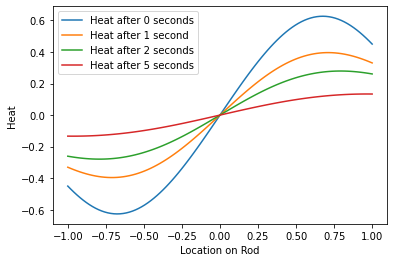

In [2]:
def heat(x,t): # heat approximation as a function of location x and time t
    return(0.40528473*np.sin(np.pi*x/2)*np.exp(-0.3**2*np.pi**2*t/4)+0.31830989*np.sin(2*np.pi*x/2)*np.exp(-0.3**2*2**2*np.pi**2*t/4)-0.04503164*np.sin(3*np.pi*x/2)*np.exp(-0.3**2*3**2*np.pi**2*t/4))

x = np.linspace(-1,1,100) # location values between -1 and 1 for plotting
plt.figure()
plt.plot(x, heat(x,0), label='Heat after 0 seconds')
plt.plot(x, heat(x,1), label='Heat after 1 second')
plt.plot(x, heat(x,2), label='Heat after 2 seconds')
plt.plot(x, heat(x,5), label='Heat after 5 seconds')
plt.legend()
plt.xlabel('Location on Rod')
plt.ylabel('Heat')
plt.show()

The idea in the above plot is that the left side of the rod (from -1.00 to 0.00) starts off being colder than the ambient temperature with the end (at -1.00) the coldest while the right side of the rod (from 0.00 to 1.00) starts off hotter than the ambient temperature with the end (at 1.00) the hottest. After a few seconds, the left side of the rod warms up while the right side of the rod cools down until the temperature of the rod at every point becomes the same as the ambient temperature, 0.

The heat function defined in the cell below defines the approximate heat of a rod situated from $x=-1.0$ to $x=1.0$ with thermal diffusivity $\alpha =0.5$ after $t$ seconds using the Fourier approximation coefficients `bs` of a function that describes the starting heat distribution.

In [ ]:
def heat(x,t,bs):
    n = bs.shape[0]
    heat = np.zeros(x.shape[0])
    for i in range(n):
        heat += bs[i]*np.sin(i*np.pi*x/2)*np.exp(-0.5**2*i**2*np.pi**2*t/4)
    return(heat)

- In the code cell below, use the `FourierApprox` object created in the previous activity (or create a new instance if you'd like to change your function `func`) to extract the $b_i$ coefficients as `bs`.
- Use `bs` to plot the heat of the rod for x-values from -1.0 to 1.0 after t=0, t=1, t=2, and t=5 seconds on the same plot. Be sure to add labels and a legend to your plot.

In [ ]:
# use Fourier_approx to extract the b_i coefficients of func

bs = 

In [ ]:
# plot the heat from x=-1.0 to x=1.0 after t=0, t=1, t=2, and t=5 seconds

x = np.linspace(-1,1,100)


<hr style="border:5px solid cyan"> </hr>